In [1]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [2]:
nelems = 5
degree = 1
tol  = 1e-5
ndims = 1

In [3]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [4]:
# prepare residual
ns = function.Namespace()
ns.pi = numpy.pi
ns.x = geom
ns.basis = domain.basis('discont', degree=degree)
ns.u = 'basis_n ?lhs_n'
ns.C = 10
ns.f = ' (2 pi)^2 sin( 2 pi x_0 )'
ns.g = ' 0 '
ns.dg = '2 pi'

In [5]:
# construct residual and inertia vector
res = domain.integral('-basis_n,0 u_,0 + basis_n f' @ ns, geometry=ns.x, degree=5)
res += domain.interfaces.integral('-[basis_n] n_0 ({u_,0} - .5 C [u_,0] n_0)' @ ns, geometry=ns.x, degree=5)
# res += domain.boundary.integral('basis_n n_0 (0.5 (dg + u_,0) - .5 C (dg - u_,0) n_0)' @ ns, geometry=ns.x, degree=degree*2)

sqr = domain.boundary.integral('(u - g)^2' @ ns, geometry=ns.x, degree=degree*2)
cons = solver.optimize('lhs', sqr, droptol=1e-15)

optimize > constrained 2/10 dofs


solve > solver returned with residual 2e+01


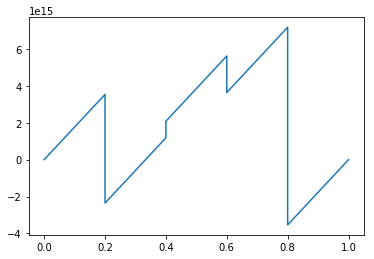

In [6]:
# find lhs such that res == 0 and substitute this lhs in the namespace
# lhs = solver.solve_linear('lhs', res)
lhs = solver.solve_linear('lhs', res, constrain=cons)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
plt.plot(x, u)
# plt.ylim(-2,2)